In [1]:
import os
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
variable_path_base = r'../data/variables'
variable_files_pattern = 'var-mes-*.zip' #'var-mes-*-fill-median-10.csv'
variable_file_output = 'var-mes-{etiqueta}_sct.png' #'var-mes-{etiqueta}-fill-median-10_sct.png'

In [3]:
variable_path_base = variable_path_base.split('/')
variable_files = glob.glob(os.path.join(*variable_path_base, variable_files_pattern))
print(len(variable_files), variable_files)

7 ['..\\data\\variables\\var-mes-PTPM_CON.zip', '..\\data\\variables\\var-mes-PT_10_TT_D.zip', '..\\data\\variables\\var-mes-Q_MEDIA_D.zip', '..\\data\\variables\\var-mes-Q_MN_D.zip', '..\\data\\variables\\var-mes-Q_MX_D.zip', '..\\data\\variables\\var-mes-TMN_CON.zip', '..\\data\\variables\\var-mes-TMX_CON.zip']


In [4]:
dtypes = { 'CodigoEstacion':'category','Etiqueta':'category'}
dateparse = lambda x: datetime.strptime(x, '%Y-%m')

In [5]:
def exploreVariable(f):
    start_time = time.time()
    print(f'Archivo: h:{time.asctime()} {f}')
    print(f'Leyendo...')
    df = pd.read_csv(f, dtype = dtypes, parse_dates = ['Fecha'], date_parser = dateparse)#, index_col = ['Fecha', 'CodigoEstacion'])
    print(f'**** r:{df.shape} h:{time.asctime()} t:{(time.time() - start_time) / 60} ****')
    
    etiqueta = df.iat[0,1]
    cols_explore = df.loc[0:1,'min':'max'].columns
    
    print(f'Etiqueta leída: {etiqueta}')
    
    print(f'Generando gráfica...')
    fig = plt.figure(figsize = (15,10))
    fig.suptitle(f'{etiqueta}', fontsize=16)

    for i, c in enumerate(cols_explore):
        ax = fig.add_subplot(220 + i + 1)
        g = sns.scatterplot(x = 'Fecha', y = c, data = df, ax = ax)
        #g = sns.boxplot(df[c], showfliers = False, ax = ax)
    
    print(f'**** h:{time.asctime()} t:{(time.time() - start_time) / 60} ****')

    print(f'Grabando...', variable_file_output.format(etiqueta = etiqueta))
    p = os.path.join(*variable_path_base, 'images', variable_file_output.format(etiqueta = etiqueta))
    plt.savefig(p)
    print(f'**** h:{time.asctime()} t:{(time.time() - start_time) / 60} ****')

Archivo: h:Mon Jun 15 18:51:24 2020 ..\data\variables\var-mes-PTPM_CON.zip
Leyendo...
**** r:(455246, 7) h:Mon Jun 15 18:51:32 2020 t:0.14183576107025148 ****
Etiqueta leída: PTPM_CON
Generando gráfica...
**** h:Mon Jun 15 18:51:33 2020 t:0.1454962174097697 ****
Grabando... var-mes-PTPM_CON_bp.png
**** h:Mon Jun 15 18:51:33 2020 t:0.15121796131134033 ****
Archivo: h:Mon Jun 15 18:51:33 2020 ..\data\variables\var-mes-PT_10_TT_D.zip
Leyendo...
**** r:(4253, 7) h:Mon Jun 15 18:51:33 2020 t:0.0013667424519856772 ****
Etiqueta leída: PT_10_TT_D
Generando gráfica...
**** h:Mon Jun 15 18:51:33 2020 t:0.004516613483428955 ****
Grabando... var-mes-PT_10_TT_D_bp.png
**** h:Mon Jun 15 18:51:33 2020 t:0.008899935086568196 ****
Archivo: h:Mon Jun 15 18:51:33 2020 ..\data\variables\var-mes-Q_MEDIA_D.zip
Leyendo...
**** r:(170956, 7) h:Mon Jun 15 18:51:37 2020 t:0.06262645324071249 ****
Etiqueta leída: Q_MEDIA_D
Generando gráfica...
**** h:Mon Jun 15 18:51:37 2020 t:0.06514302094777426 ****
Grabando.

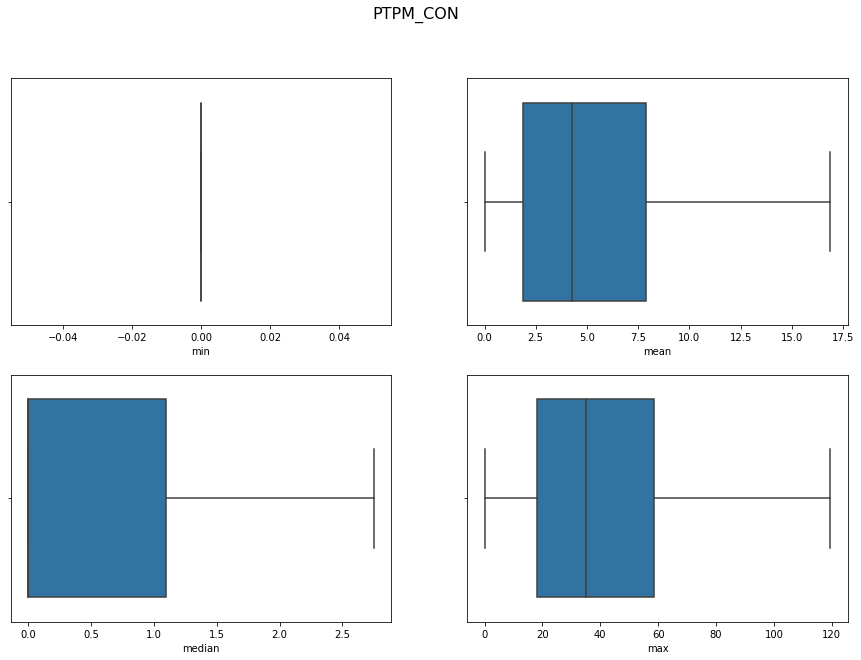

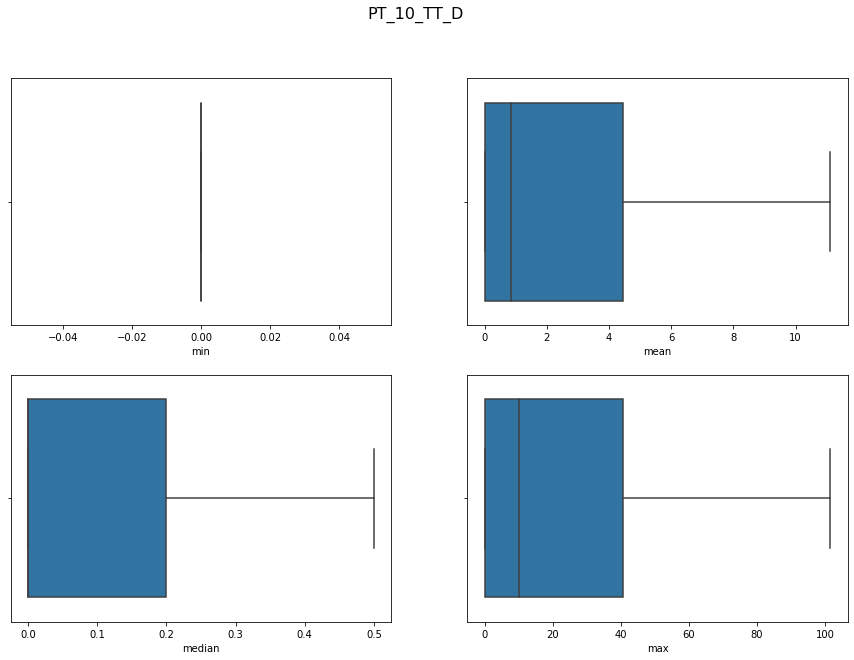

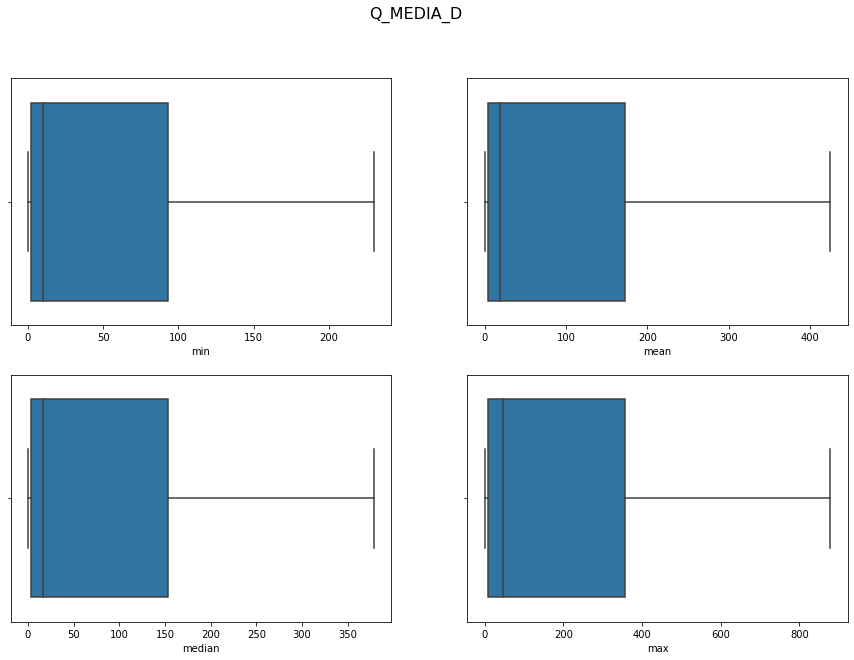

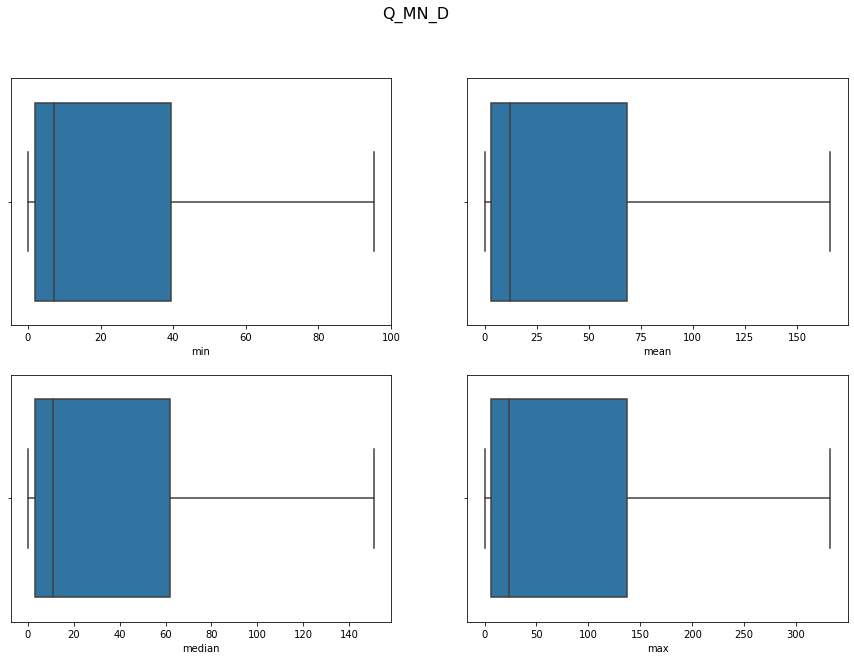

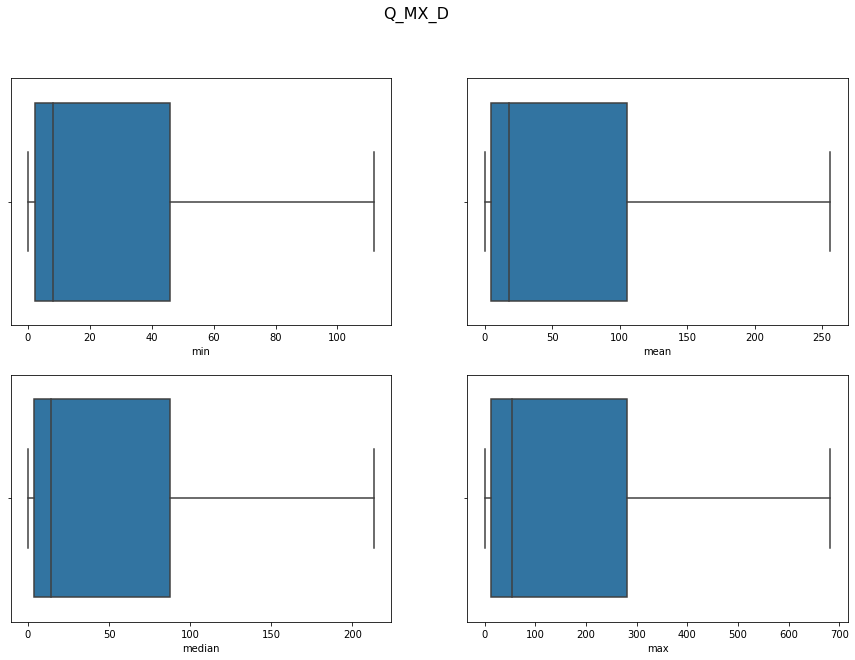

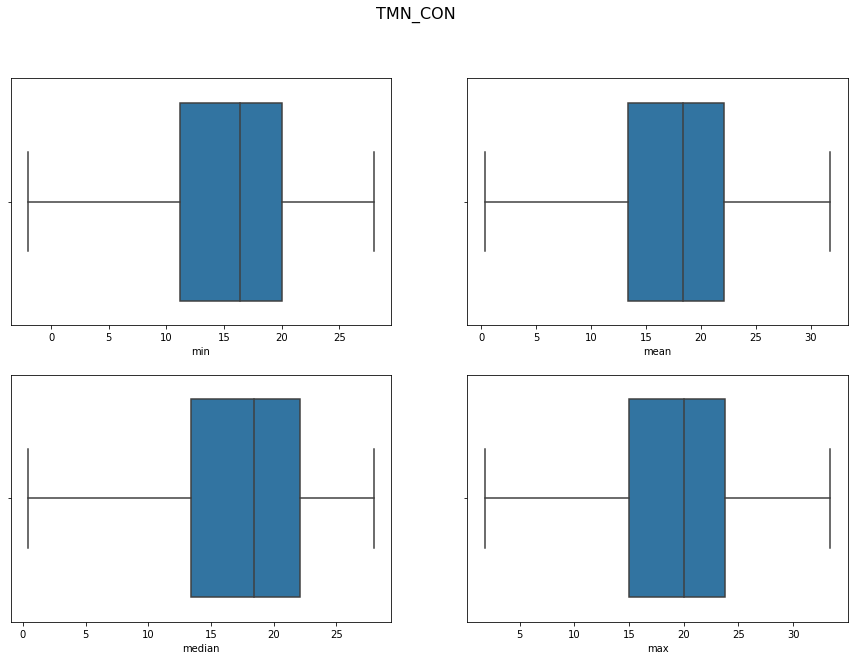

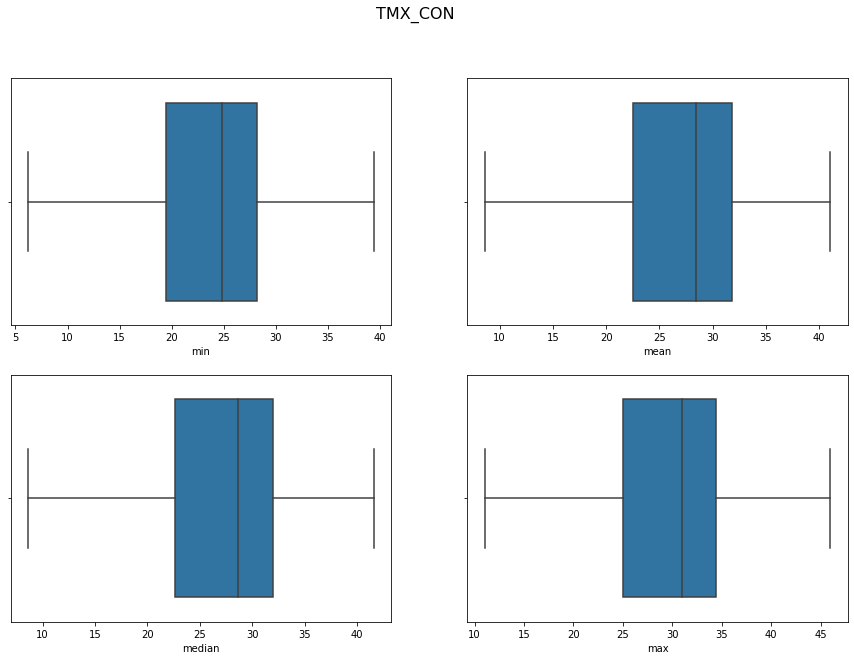

In [6]:
%%time
for f in variable_files:
    exploreVariable(f)